## Food Recommender System

In [1]:
!pwd

/home/afnan/code/Alanoudis/food-delivery-rec/notebooks/afnan


In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)

In [ ]:
file_path = "../../data/updated_data/orders_sg10k.txt"
orders = pd.read_csv(file_path)
orders.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [4]:
orders.shape

(10001, 9)

## Clean the Data
### Remove Unnecessary Columns

In [5]:
orders.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
orders.head(3)

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days


In [ ]:

file_path2 = "../../data/raw_data/products_sg.txt"
products = pd.read_csv(file_path2)

products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [8]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
products.head(3)

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024


In [10]:

file_path3 = "../../data/raw_data/vendors_sg.txt"
vendors = pd.read_csv(file_path3)

vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,0,b160c319,d2786168,w21z6,mexican
1,1,9c8f010e,d2786168,w21ze,mexican
2,4,03eb25e1,5055ab25,w21ze,bak kut teh
3,5,3613129a,8984acb6,w23b1,italian
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh


In [11]:
vendors.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
vendors.head(3)

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh


In [13]:

# Step 1: Merge orders with products on vendor_id and product_id
orders_products = orders.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [14]:
full_data.describe()

,order_id,day_of_week,unit_price
count,10001.000000,10001.000000,10001.000000
mean,2419.860114,3.311669,0.003485
std,1403.026996,2.003286,0.003377
min,0.000000,0.000000,0.000000
25%,1222.000000,2.000000,0.001600
50%,2450.000000,4.000000,0.002800
75%,3620.000000,5.000000,0.004000
max,4801.000000,6.000000,0.090800


In [15]:
full_data.shape

(10001, 13)

### 👥 Step 2: Analyze Customer Preferences

In [16]:
full_data["primary_cuisine"].nunique()

71

In [17]:
# top 20 most popular cuisines
full_data["primary_cuisine"].value_counts(dropna=False).head(73)

primary_cuisine
chinese                 1126
indian                   624
dessert                  506
noodles                  489
bubble tea               442
coffee                   420
japanese                 389
singaporean              347
mala xiang guo           343
dim sum                  323
western                  320
soups                    312
thai                     308
fried chicken            304
chicken                  282
rice dishes              225
pizza                    223
chicken rice             201
fried rice               173
sushi                    171
seafood                  159
nasi lemak               156
burgers                  154
american                 149
malaysian                147
cakes                    139
asian                    120
sandwiches               107
ayam penyet              102
ramen                     91
korean                    90
pasta                     88
indonesian                82
snacks                    7

In [18]:
global_cuisine_category = {
    "japanese": "japanese",
    "ramen": "japanese",
    "sushi": "japanese",

    " korean": " korean",

    "chinese": "chinese",
    "dim sum": "chinese",
    "bak kut teh": "chinese",
    "mala xiang guo": "chinese",
    "mala soups": "chinese",
    "hokkien mee": "chinese",
    "noodles": "chinese",
    "tea": "chinese",

    "indian": "indian",
    "curry": "indian",

    "thai": "thai",

    "vietnamese": "vietnamese",
    "pho": "vietnamese",

    "singaporean": "singaporean",
    "chicken rice": "singaporean",
    "ban mian": "singaporean",
    "yong tau foo": "singaporean",

    "indonesian": "indonesian",
    "ayam penyet": "indonesian",

    "malaysian": "malaysian",
    "nasi lemak": "malaysian",
    "roti prata": "malaysian",

    "american": "american",
    "burgers": "american",
    "fried chicken": "american",
    "chicken": "american",
    "sandwiches": "american",
    "grill": "american",
    "fries": "american",
    "fast food": "american",
    "chicken wings": "american",

    "italian": "italian",
    "pizza": "italian",
    "pasta": "italian",

    "french": "french",
    "german": "german",
    "spanish": "spanish",
    "mexican": "mexican",
    "turkish": "turkish",
    "lebanese": "lebanese",

    # Reassign rice-based dishes
    "rice dishes": "asian",
    "asian": "asian",
    "fried rice": "asian",
    "seafood": "asian",
    "soups": "asian",
    "filipino": "asian",
    "laksa": "asian",
    "porridge": "asian",
    "fish soup": "asian",

    # Everything else defaults to snacks
}


In [19]:
pd.Series(global_cuisine_category.values()).unique()

array(['japanese', ' korean', 'chinese', 'indian', 'thai', 'vietnamese',
       'singaporean', 'indonesian', 'malaysian', 'american', 'italian',
       'french', 'german', 'spanish', 'mexican', 'turkish', 'lebanese',
       'asian'], dtype=object)

In [20]:
pd.Series(global_cuisine_category.values()).nunique()

18

In [21]:
full_data['cuisine_origin'] = full_data['primary_cuisine'].str.strip().map(global_cuisine_category)
full_data['cuisine_origin'].fillna('snacks', inplace=True)


/tmp/ipykernel_1333/2676602241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['cuisine_origin'].fillna('snacks', inplace=True)


In [22]:
print(full_data[['primary_cuisine', 'cuisine_origin']].drop_duplicates().sort_values(by='primary_cuisine'))


           primary_cuisine cuisine_origin
3347             acai bowl         snacks
66                american       american
51                   asian          asian
170            ayam penyet     indonesian
2915           bak kut teh        chinese
41                  bakery         snacks
2420              ban mian    singaporean
208              beverages         snacks
195             bubble tea         snacks
30                 burgers       american
429                  cakes         snacks
189                chicken       american
90            chicken rice    singaporean
103                chinese        chinese
57                  coffee         snacks
376                  curry         indian
32                 dessert         snacks
196               dim sum         chinese
889                  donut         snacks
641              fast food       american
399              fish soup          asian
5675                french         french
81           fried chicken       a

In [23]:
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,cuisine_origin
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen,japanese
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen,japanese
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen,japanese
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen,japanese
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen,japanese


In [24]:
!pwd

/home/afnan/code/Alanoudis/food-delivery-rec/notebooks/afnan


In [25]:
full_data[["name"]].to_csv("meals.csv")

In [26]:
df = pd.read_csv('meals.csv')

In [27]:
df.head()

,Unnamed: 0,name
0,0,201. Japanese Garlic Karaage Don
1,1,204. Chicken Cutlet Don
2,2,206. Beef Sukiyaki Don
3,3,209. Japanese Beef Yakiniku Don
4,4,210. Teriyaki Salmon Don


In [28]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

### 🟦  Clean the Dish Names

In [29]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+\.', '', text)         # Remove leading numbers like "204."
    text = re.sub(r'[^\w\s]', '', text)       # Remove punctuation
    text = re.sub(r'\d+', '', text)           # Remove remaining numbers
    text = text.strip()
    return text

df['name_cleaned'] = df['name'].fillna('').apply(clean_text)


In [30]:
df['name_cleaned'].head()

0    japanese garlic karaage don
1             chicken cutlet don
2              beef sukiyaki don
3     japanese beef yakiniku don
4            teriyaki salmon don
Name: name_cleaned, dtype: object

### 🟦 Create TF-IDF Matrix

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df['name_cleaned'])

# Summary
print("✅ TF-IDF matrix created.")
print(f"Matrix shape: {tfidf_matrix.shape}")


✅ TF-IDF matrix created.
Matrix shape: (10001, 3806)


### 🟦 Compute Cosine Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Preview
#print("✅ Cosine similarity matrix built.")
#print("Top-left 5x5 sample:")
#print(cosine_sim_matrix[:5, :5])


### 🟦  Build Recommender Function

In [33]:
# Create a lookup index using cleaned names, keeping only the first match
indices = df['name_cleaned'].drop_duplicates().reset_index(drop=True)
lookup = pd.Series(indices.index, index=indices.values)


In [34]:
def get_similar_meals(title, cosine_sim=cosine_sim_matrix, lookup=lookup, df=df):
    try:
        title_cleaned = clean_text(title)

        if title_cleaned not in lookup:
            return f"Meal '{title}' not found in the dataset."

        idx = lookup[title_cleaned]

        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = [score for score in sim_scores if score[0] != idx][:10]
        meal_indices = [i[0] for i in sim_scores]

        return df['name_cleaned'].iloc[meal_indices]

    except Exception as e:
        return f"Error: {e}"


### 🟦 Test the Recommender

In [35]:
test_meal = "chicken cutlet don"
similar_meals = get_similar_meals(test_meal)
print(similar_meals)

3242          chicken cutlet don
4546              chicken cutlet
5465            m chicken cutlet
5720              chicken cutlet
9766            a chicken cutlet
9768            a chicken cutlet
5       chicken cutlet with rice
853     chicken cutlet with rice
2687         chicken cutlet rice
4071         chicken cutlet rice
Name: name_cleaned, dtype: object


In [36]:
test_meal = "japanese garlic karaage don"
similar_meals = get_similar_meals(test_meal)
print(similar_meals)


3241         japanese garlic karaage don
3             japanese beef yakiniku don
9170          japanese beef yakiniku don
4055                       japanese rice
7893                         karaage set
1831                       curry karaage
8503                 chicken karaage pcs
3962    japanese curry w  croquette rice
4054                r fish karaage ramen
1899                          salmon don
Name: name_cleaned, dtype: object


In [37]:
test_meal = "sushis"
similar_meals = get_similar_meals(test_meal)
print(similar_meals)

Meal 'sushis' not found in the dataset.


In [38]:
def get_similar_meals_by_keyword(keyword, df=df):
    try:
        keyword_cleaned = clean_text(keyword)

        # Find all meals that contain the keyword
        matches = df[df['name_cleaned'].str.contains(keyword_cleaned, case=False, na=False)]

        if matches.empty:
            return f"No meals found containing '{keyword}'."

        return matches['name_cleaned'].drop_duplicates().reset_index(drop=True)

    except Exception as e:
        return f"Error: {e}"


In [39]:
test_meal = "chicken"
similar_meals = get_similar_meals_by_keyword(test_meal)
similar_meals.head(10)


0                  chicken cutlet don
1            chicken cutlet with rice
2                        chicken chop
3             chicken wings with rice
4              chicken chop with rice
5                      butter chicken
6    chicken wing nasi lemak istimewa
7                chicken hor fun 鸡丝河粉
8                       chicken piece
9             chicken claw noodle 凤爪面
Name: name_cleaned, dtype: object

In [40]:
from sklearn.decomposition import NMF

# --- 3. Define and Fit the NMF Model ---
print(f"--- Fitting NMF model to find topics ---")

# Define the number of "main ideas" you want to find
num_topics = 20

# Initialize NMF
# 'n_components' is the number of topics.
# 'random_state' ensures you get the same results every time you run it.
# 'init='nndsvda'' is a smart initialization method that often leads to better results.
# 'max_iter=500' gives the model more time to converge.
nmf_model = NMF(
    n_components=num_topics,
    random_state=42,
    max_iter=500,
    init='nndsvda'
)

# Fit NMF to our TF-IDF matrix
# This is the main "training" step that discovers the topics.
nmf_model.fit(tfidf_matrix)

print("--- NMF model training complete ---")


# --- 4. Define Function to Display Topics ---

# Get the list of all unique words (the "features") from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    """Prints the top words for each topic found by the model."""
    print("\n--- Discovered Topics (Main Ideas) ---")

    # 'model.components_' is a matrix (topics x words)
    # Each row is a topic, and the values are the "importance" of each word.
    for topic_idx, topic in enumerate(model.components_):

        # Get the index numbers of the top N words for this topic
        top_word_indices = topic.argsort()[:-no_top_words - 1:-1]

        # Get the actual words from their index numbers
        top_words = [feature_names[i] for i in top_word_indices]

        # Print the topic
        print(f"Topic {topic_idx}:")
        print(" ".join(top_words))
        print("-" * 20)

# --- 5. Display the Results ---
# Show the top 8 words for each of our 20 topics.
display_topics(model=nmf_model,
               feature_names=feature_names,
               no_top_words=8)

--- Fitting NMF model to find topics ---
--- NMF model training complete ---

--- Discovered Topics (Main Ideas) ---
Topic 0:
rice 白饭 white steamed roasted 米饭 fragrant curry
--------------------
Topic 1:
chicken curry chop cutlet crispy grilled teriyaki pc
--------------------
Topic 2:
tea milk medium green honey thai oolong caramel
--------------------
Topic 3:
set bee hoon kee yew 友记鸭饭 create sandwich
--------------------
Topic 4:
fried seasoned prawns dumpling seafood thai prawn bee
--------------------
Topic 5:
egg mayo salted prata braised sandwich prawns seasoned
--------------------
Topic 6:
pcs wings separation nuggets mai sauce siew golden
--------------------
Topic 7:
nasi lemak ayam penyet goreng sambal selected drink
--------------------
Topic 8:
large kopi teh iced green yakult ovaltine lemon
--------------------
Topic 9:
plain prata 米饭 thosai pc coin bomb naan
--------------------
Topic 10:
toast butter kaya traditional sugar peanut french naan
--------------------
Topic 

In [41]:
!ls

data_explor_2.ipynb  data_explor.ipynb:Zone.Identifier
data_explor.ipynb    meals.csv


In [42]:
full_data["name"].nunique()

5683

In [43]:
# Example: Filter for Italian cuisine
mexican_orders = full_data[full_data['primary_cuisine'] == 'mexican']


##### 🔸 Most Frequent Customers per Cuisine(mexican cuisine)

In [44]:
top_customers = mexican_orders['customer_id'].value_counts().head(10)
print(top_customers)

customer_id
3307033447    17
a366f0d29a     6
53d1c13658     2
70e0ad7f1e     2
f9dbb6d1b8     1
73a3961ed8     1
01a45b2349     1
92d6272d7d     1
f3dbf24141     1
86e84e17a2     1
Name: count, dtype: int64


### Most Ordered Products per Cuisine

In [45]:
top_dishes =mexican_orders['name'].value_counts().head(10)
print(top_dishes)


name
Honey Tequila Chicken Wings                  4
Free Heineken 0.0                            4
Spicy Chicken Quesadilla                     4
Roasted Tomato Salsa (Vegan)(Gluten-Free)    2
Rotisserie Chicken                           2
Smoky Chipotle BBQ                           1
2 Breakfast Tacos                            1
Chico Slaw (VG)                              1
Quinoa Salad (VG)(GF)                        1
Roasted Veggies (VG)(GF)                     1
Name: count, dtype: int64


### 🔸 Average Spending per Customer

In [46]:
avg_spending = mexican_orders.groupby('customer_id')['unit_price'].mean().sort_values(ascending=False).head(10)
print(avg_spending)


customer_id
3307033447    0.007435
73a3961ed8    0.005600
f3dbf24141    0.005600
53d1c13658    0.003600
a366f0d29a    0.002800
70e0ad7f1e    0.001800
01a45b2349    0.000000
86e84e17a2    0.000000
92d6272d7d    0.000000
f9dbb6d1b8    0.000000
Name: unit_price, dtype: float64


In [47]:
spending_per_customer = mexican_orders.groupby('customer_id')['unit_price'].sum().sort_values(ascending=False).head(10)
print(spending_per_customer)


customer_id
3307033447    0.1264
a366f0d29a    0.0168
53d1c13658    0.0072
f3dbf24141    0.0056
73a3961ed8    0.0056
70e0ad7f1e    0.0036
01a45b2349    0.0000
86e84e17a2    0.0000
92d6272d7d    0.0000
f9dbb6d1b8    0.0000
Name: unit_price, dtype: float64


In [48]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### Group Dishes by Order

In [49]:
# Group dish names by order_id
orders2 = full_data.groupby('order_id')['name'].apply(list).tolist()


In [50]:
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,cuisine_origin
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen,japanese
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen,japanese
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen,japanese
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen,japanese
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen,japanese


### Tokenize Dish Names

In [51]:
# Split each dish name into tokens (words)

tokenized_orders = [[dish.lower().split() for dish in order] for order in orders2]

# Flatten inner lists so each order is a list of words
tokenized_orders = [[word for dish in order for word in dish] for order in tokenized_orders]


In [52]:
len(tokenized_orders)

4802

In [53]:
len(tokenized_orders[0])

22

In [54]:
from gensim.models import Word2Vec

# Train the model
model = Word2Vec(sentences=tokenized_orders, vector_size=20, window=5, min_count=2, workers=4, sg=1)


In [55]:
# Find dishes similar to "karaage"
model.wv.most_similar("salmon", topn=5)


[('don', 0.9621098041534424),
 ('teriyaki', 0.8961438536643982),
 ('sashimi', 0.8957017660140991),
 ('steak', 0.8820583820343018),
 ('tori', 0.8765750527381897)]

In [56]:
# Find dishes similar to "ramen"
model.wv.most_similar("ramen", topn=5)

[('grilled', 0.9201303124427795),
 ('udon', 0.8940363526344299),
 ('prawns', 0.892971932888031),
 ('seasoned', 0.8839151263237),
 ('cutlet', 0.8785425424575806)]

In [57]:
# Find dishes similar to "pizza"
model.wv.most_similar("pizza", topn=5)

[('(reg)', 0.9892733693122864),
 ('recipe', 0.9888930320739746),
 ('truffled', 0.9867165088653564),
 ('(2', 0.9862599968910217),
 ('no', 0.9857614636421204)]

### 🎨  Word Cloud of Dish Names

In [58]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
text = " ".join(full_data['name'].dropna().astype(str).tolist())


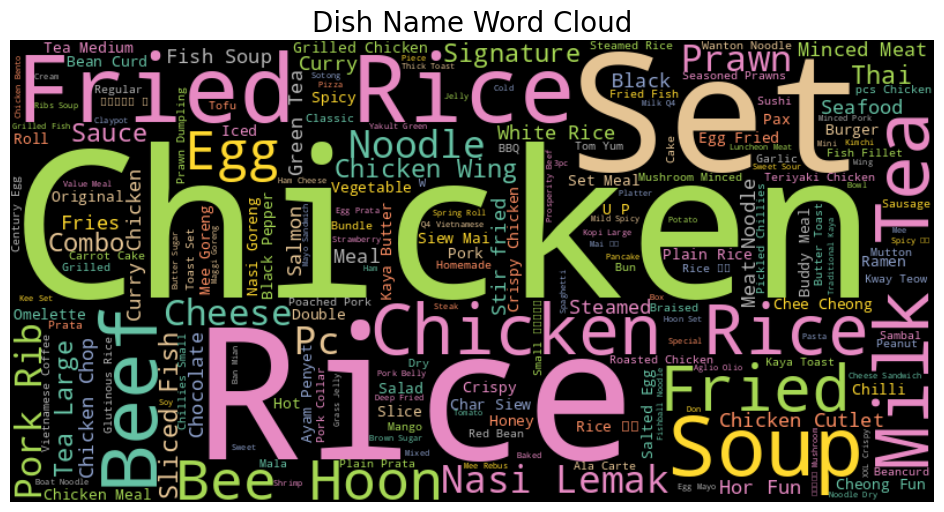

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(text)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Dish Name Word Cloud", fontsize=20)
plt.show()

### 👥 Top Customers

In [61]:
top_customers = orders['customer_id'].value_counts().head(10)
print(top_customers)


customer_id
857c695baa    182
e09be49ad4    131
4e8b406597    108
ac01e97093    102
b8a1953622     74
5ebbe86884     68
1687ceff41     66
fec4d1f339     65
818a757422     62
57cdd9b3a7     61
Name: count, dtype: int64


### 🗺️ Geohash Distribution

<Axes: title={'center': 'Top Geohash Areas'}, xlabel='geohash'>

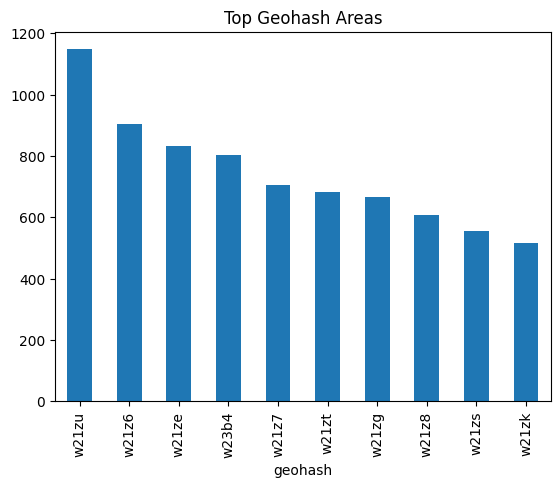

In [62]:
orders['geohash'].value_counts().head(10).plot(kind='bar', title='Top Geohash Areas')

In [63]:
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,cuisine_origin
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen,japanese
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen,japanese
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen,japanese
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen,japanese
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen,japanese


In [65]:
import numpy as np
import pandas as pd

# Set seed for reproducibility (optional)
np.random.seed(42)

# Total number of rows
n_rows =full_data.shape[0]
# Count UNIQUE orders per customer (not rows)
order_counts = full_data.groupby('customer_id')['order_id'].nunique()

# Map order counts back to original dataframe
full_data['order_frequency'] = full_data['customer_id'].map(order_counts)

# Define thresholds based on order frequency quartiles
high_freq_threshold = full_data['order_frequency'].quantile(0.75)
medium_freq_threshold = full_data['order_frequency'].quantile(0.50)


# Initialize rating column
ratings = np.zeros(n_rows)

# Assign ratings based on order frequency
for idx in range(n_rows):
    order_freq = full_data.iloc[idx, full_data.columns.get_loc('order_frequency')]

    if order_freq >= high_freq_threshold:
        # Most frequent orders: mostly 5 stars
        ratings[idx] = np.random.choice([5, 4, 3], p=[0.85, 0.10, 0.05])

    elif order_freq >= medium_freq_threshold:
        # Medium frequency: some lower ratings for 1, 2, 3 stars
        ratings[idx] = np.random.choice([5, 4, 3, 2, 1], p=[0.30, 0.25, 0.25, 0.15, 0.05])

    else:
        # Lower frequency: random distribution
        ratings[idx] = np.random.randint(1, 6)

# Add rating column to dataframe
full_data['rating'] = ratings.astype(int) 

In [144]:
full_data.head(10)

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,cuisine_origin,order_frequency,rating
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen,japanese,1,4
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen,japanese,1,5
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen,japanese,1,3
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen,japanese,1,5
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen,japanese,1,5
5,f374c8c54c,w21zt,1,21830106,f245bdf79350,4,19:03:03,61 days,Chicken Cutlet with Rice,0.0020,NaN,w21zt,western,snacks,1,2
6,f374c8c54c,w21zt,1,21830106,146127be77d4,4,19:03:03,61 days,Chicken Chop,0.0028,NaN,w21zt,western,snacks,1,3
7,f374c8c54c,w21zt,1,21830106,6c108c0fb2b9,4,19:03:03,61 days,Chicken Wings with Rice,0.0016,NaN,w21zt,western,snacks,1,3
8,f374c8c54c,w21zt,1,21830106,da422c7836e1,4,19:03:03,61 days,Saba Fish with Rice,0.0024,NaN,w21zt,western,snacks,1,3
9,f374c8c54c,w21zt,1,21830106,01110c80a0fa,4,19:03:03,61 days,Chicken Chop with Rice,0.0020,NaN,w21zt,western,snacks,1,5


In [67]:
pip install pandas numpy scipy implicit scikit-learn


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 3.8 MB/s  0:00:02 eta 0:00:01m
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [implicit]1/2 [implicit]
Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
from implicit.als import AlternatingLeastSquares
df = full_data[['customer_id', 'vendor_id', 'order_frequency', 'rating']].copy()

# Create a weighted score: order_frequency × rating
df['score'] = df['order_frequency'] * df['rating']


### 🔹  Encode Users and Vendors

In [146]:
# Encode customer_id and vendor_id as numeric codes
df['user_code'] = df['customer_id'].astype('category').cat.codes
df['vendor_code'] = df['vendor_id'].astype('category').cat.codes


### 🧮  Create Implicit Feedback Matrix

In [147]:
# Build sparse interaction matrix (users × vendors)
interaction_matrix = coo_matrix(
    (df['score'], (df['user_code'], df['vendor_code']))).T.tocsr()


In [148]:
interaction_matrix.shape

(2351, 1072)

### Train ALS Model

In [149]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
# Initialize ALS model
# Initialize ALS model
als_model = AlternatingLeastSquares(
    factors=50,
    regularization=0.1,
    iterations=30,
    random_state=42
)

# Fit the model (transpose for implicit format: items × users)
als_model.fit(interaction_matrix.T)


/home/afnan/.pyenv/versions/3.10.6/envs/food-delivery-rec/lib/python3.10/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.005020856857299805 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

### 🔍 Build Lookup Tables

In [150]:
# Map encoded indices back to original IDs
user_map = dict(enumerate(df['customer_id'].astype('category').cat.categories))
vendor_map = dict(enumerate(df['vendor_id'].astype('category').cat.categories))

# Reverse lookup for user input
reverse_user_map = {v: k for k, v in user_map.items()}
reverse_vendor_map = {v: k for k, v in vendor_map.items()}


### 🍽 Recommend Restaurants for a User

In [151]:
def recommend_vendors(user_id, 
                      model=als_model,
                      matrix = interaction_matrix, 
                      user_lookup=reverse_user_map,
                      vendor_lookup=vendor_map, N=10):
    if user_id not in user_lookup:
        return "Cold-start user. Recommend popular restaurants."
    
    user_idx = user_lookup[user_id]
    user_items = interaction_matrix.T.tocsr()  # Ensure CSR format
    
    # Get recommendations
    recommended = model.recommend(user_idx, user_items[user_idx], N=N)
    
    # Safely extract vendor IDs
    recommended_vendors = [vendor_lookup[int(i[0])] for i in recommended]
    
    return recommended_vendors


In [143]:
# --- Cuisine-Based Filtering for ALS Recommendations ---
user_id = "1ba124d4e5"  # Replace with any valid customer_id

# Step A: Get ALS recommendations
als_recs = recommend_vendors(user_id, N=20)

# Step B: Get user's preferred cuisine
user_cuisine = full_data[full_data['customer_id'] == user_id]['cuisine_origin'].mode()[0]

# Step C: Get vendors that match the user's cuisine
valid_vendors = full_data[full_data['cuisine_origin'] == user_cuisine]['vendor_id'].unique()

# Step D: Filter ALS recommendations by cuisine
filtered_recs = [v for v in als_recs if v in valid_vendors]

# Step E: Display results
print("Recommended restaurants for user:", user_id)
print("Cuisine-matched ALS recommendations:", filtered_recs)


Recommended restaurants for user: 1ba124d4e5
Cuisine-matched ALS recommendations: []


In [152]:
# Choose a valid user ID from your dataset
user_id = "f374c8c54c"

# Print recommendations
print("Recommended restaurants for user:", user_id)
print(recommend_vendors(user_id))


Recommended restaurants for user: f374c8c54c
['f8b0e5ea', '0002b34d']


#### 🔍  See What the User Ordered

In [153]:
# Filter orders placed by the user
user_orders = full_data[full_data['customer_id'] == "f374c8c54c"]

# Display key details
user_orders[['vendor_id', 'name', 'cuisine_origin', 'unit_price', 'rating']]


,vendor_id,name,cuisine_origin,unit_price,rating
5,21830106,Chicken Cutlet with Rice,snacks,0.0020,2
6,21830106,Chicken Chop,snacks,0.0028,3
7,21830106,Chicken Wings with Rice,snacks,0.0016,3
8,21830106,Saba Fish with Rice,snacks,0.0024,3
9,21830106,Chicken Chop with Rice,snacks,0.0020,5
10,21830106,Tomato Sauce Spaghetti,snacks,0.0020,4
11,21830106,Grilled Fish,snacks,0.0036,3
12,21830106,Fish & Chips,snacks,0.0028,5


This will show:

Which vendors the user ordered from

What dishes they ordered

Cuisine type, price, and rating

#### 🔍 See What the Recommended Vendors Offer

In [154]:
# List of recommended vendor IDs
recommended_ids = ['f8b0e5ea', '0002b34d']

# Filter full_data for those vendors
vendor_offers = full_data[full_data['vendor_id'].isin(recommended_ids)]

# Display their menu items
vendor_offers[['vendor_id', 'name', 'cuisine_origin', 'unit_price']]


,vendor_id,name,cuisine_origin,unit_price
3381,0002b34d,Back To Basics (Vegan),snacks,0.0036
3382,0002b34d,Avo Vanilla,snacks,0.0036
3383,0002b34d,Goodfellas,snacks,0.0040
3384,0002b34d,Avo Vanilla,snacks,0.0036
6894,f8b0e5ea,Tau Pok,chinese,0.0028
6895,f8b0e5ea,Pork Tenderloin Soup,chinese,0.0060
6896,f8b0e5ea,Kai Lan Vegetables,chinese,0.0052
6897,f8b0e5ea,Rice,chinese,0.0004


This will show:

What dishes those vendors serve

Their cuisine type and pricing

###  🔹 Step 1: Build the Vendor Feature Matrix

In [155]:
# Step 1: Aggregate vendor features
vendor_features = full_data.groupby('vendor_id').agg({
    'primary_cuisine': 'first',
    'unit_price': 'mean',
    'rating': 'mean'
}).reset_index()

# Step 2: One-hot encode cuisine
cuisine_encoded = pd.get_dummies(vendor_features['primary_cuisine'])

# Step 3: Normalize price and rating
vendor_features['unit_price_norm'] = (vendor_features['unit_price'] - vendor_features['unit_price'].min()) / (vendor_features['unit_price'].max() - vendor_features['unit_price'].min())
vendor_features['rating_norm'] = (vendor_features['rating'] - vendor_features['rating'].min()) / (vendor_features['rating'].max() - vendor_features['rating'].min())

# Step 4: Combine all features
content_matrix = pd.concat([cuisine_encoded, vendor_features[['unit_price_norm', 'rating_norm']]], axis=1)
content_matrix.index = vendor_features['vendor_id']


### 🔹 Step 2: Compute Vendor Similarity

In [156]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all vendors
vendor_similarity = pd.DataFrame(
    cosine_similarity(content_matrix),
    index=content_matrix.index,
    columns=content_matrix.index
)


### 🔹 Step 3: Define Hybrid Recommendation Function

In [157]:
def hybrid_recommend(user_id, N=10):
    # Step A: Get vendors the user has ordered from
    user_vendors = full_data[full_data['customer_id'] == user_id]['vendor_id'].unique()
    
    # Step B: Content-based similarity scores
    if len(user_vendors) == 0:
        return "Cold-start user. Recommend popular restaurants."
    
    content_scores = vendor_similarity[user_vendors].mean(axis=1)
    content_scores = content_scores.drop(user_vendors, errors='ignore')
    
    # Step C: ALS recommendations
    als_recs = recommend_vendors(user_id, N=50)
    als_scores = pd.Series([1 / (i + 1) for i in range(len(als_recs))], index=als_recs)
    
    # Step D: Combine scores
    hybrid_scores = pd.concat([als_scores, content_scores], axis=1).fillna(0)
    hybrid_scores.columns = ['als', 'content']
    hybrid_scores['hybrid'] = 0.5 * hybrid_scores['als'] + 0.5 * hybrid_scores['content']
    
    # Step E: Return top N
    top_hybrid = hybrid_scores['hybrid'].sort_values(ascending=False).head(N).index.tolist()
    return top_hybrid


### 🔹 Step 4: Test the Hybrid Recommender

In [158]:
user_id = "1ba124d4e5"
print("Hybrid recommendations for user:", user_id)
print(hybrid_recommend(user_id, N=10))


Hybrid recommendations for user: 1ba124d4e5
['ffb3294b', 'c869579a', 'c6cc6a1a', 'd63258a2', '797acc51', '98231831', '14095e05', '4b2eb250', 'a09256a5', '6e89c321']


In [164]:
# Filter orders placed by the user
user_orders = full_data[full_data['customer_id'] == "1ba124d4e5"]

# Display key details
user_orders[['vendor_id', 'name', 'cuisine_origin', 'unit_price', 'rating']]

,vendor_id,name,cuisine_origin,unit_price,rating
0,212753d2,201. Japanese Garlic Karaage Don,japanese,0.0060,4
1,212753d2,204. Chicken Cutlet Don,japanese,0.0068,5
2,212753d2,206. Beef Sukiyaki Don,japanese,0.0068,3
3,212753d2,209. Japanese Beef Yakiniku Don,japanese,0.0068,5
4,212753d2,210. Teriyaki Salmon Don,japanese,0.0080,5


In [159]:
recommended_vendors = ['ffb3294b', 'c869579a', 'c6cc6a1a', 'd63258a2', 
                       '797acc51', '98231831', '14095e05', '4b2eb250', 
                       'a09256a5', '6e89c321']


In [161]:
# Get menu items and vendor details for recommended vendors
recommended_details = full_data[full_data['vendor_id'].isin(recommended_vendors)]

# Display key columns
recommended_details[['vendor_id', 'name', 'cuisine_origin', 'unit_price', 'rating']].drop_duplicates()


,vendor_id,name,cuisine_origin,unit_price,rating
508,c869579a,Volcano Ramen,japanese,0.0064,4
509,c869579a,Ajisen Ramen,japanese,0.0048,4
510,c869579a,Nankotsu Ramen,japanese,0.0064,5
1020,797acc51,Scallop Spicy Ramen ホタテスパイシーラーメン,japanese,0.0072,4
2566,ffb3294b,Steamed Pork Dumpling 'Siew Mai' 鱼子蒸烧卖皇(3pcs),chinese,0.0032,2
2567,ffb3294b,Steamed Molten Salted Egg Yolk Custard Piggy B...,chinese,0.0032,5
2568,ffb3294b,Steamed Prawn Dumpling 'Ha Kao' 筍尖鲜虾饺 (3pcs),chinese,0.0032,1
3241,a09256a5,201. Japanese Garlic Karaage Don,japanese,0.0060,5
3242,a09256a5,204. Chicken Cutlet Don,japanese,0.0068,5
3656,98231831,Gyoza,japanese,0.0028,4


In [163]:
vendor_summary = recommended_details.groupby('vendor_id').agg({
    'cuisine_origin': 'first',
    'unit_price': 'mean',
    'rating': 'mean',
    'name': lambda x: list(x.unique())[:3]  # Show up to 3 sample dishes
}).reset_index()

vendor_summary


,vendor_id,cuisine_origin,unit_price,rating,name
0,14095e05,japanese,0.008000,5.000000,[Toroniku Uobushi Ramen Bundle for 1]
1,4b2eb250,japanese,0.006400,5.000000,[A5 Prawn Dumplings Shrimp Ramen 鲜虾水饺赤汤面]
2,6e89c321,japanese,0.006400,5.000000,[Kotteri Tonkotsu Ramen]
3,797acc51,japanese,0.007200,4.000000,[Scallop Spicy Ramen ホタテスパイシーラーメン ]
4,98231831,japanese,0.003000,4.500000,"[Gyoza, Piri Spicy Karaage]"
5,a09256a5,japanese,0.006400,5.000000,"[201. Japanese Garlic Karaage Don, 204. Chicke..."
6,c6cc6a1a,japanese,0.005067,4.333333,"[Spicy Ramen + 3 Pcs Gyoza, Corn Chashu Ramen,..."
7,c869579a,japanese,0.005867,4.333333,"[Volcano Ramen, Ajisen Ramen, Nankotsu Ramen]"
8,d63258a2,japanese,0.009308,4.567568,"[Wafu Seaweed Choregi Salad, Buddy Meal for 2 ..."
9,ffb3294b,chinese,0.003938,3.000000,[Steamed Pork Dumpling 'Siew Mai' 鱼子蒸烧卖皇(3pcs)...


In [166]:
# Filter full_data for recommended vendors
vendor_data = full_data[full_data['vendor_id'].isin(recommended_vendors)]

# Calculate average unit price and rating per vendor
summary = vendor_data.groupby('vendor_id')[['unit_price', 'rating']].mean().reset_index()


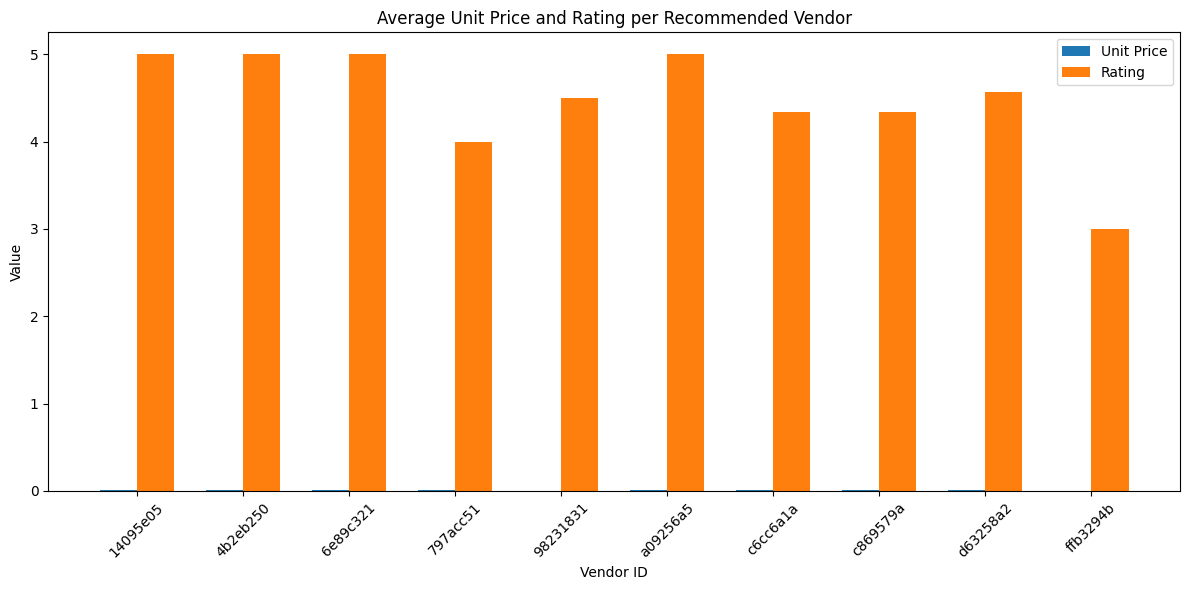

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Set up bar positions
x = np.arange(len(summary['vendor_id']))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, summary['unit_price'], width, label='Unit Price')
bars2 = ax.bar(x + width/2, summary['rating'], width, label='Rating')

# Add labels and title
ax.set_xlabel('Vendor ID')
ax.set_ylabel('Value')
ax.set_title('Average Unit Price and Rating per Recommended Vendor')
ax.set_xticks(x)
ax.set_xticklabels(summary['vendor_id'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


### 🧠 Content-Based Filtering (Cuisine + Price)

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

# Create user-cuisine matrix
cuisine_matrix = pd.pivot_table(df, index='customer_id', columns='cuisine_origin', values='order_frequency', aggfunc='sum', fill_value=0)

# Normalize
cuisine_norm = cuisine_matrix.div(cuisine_matrix.sum(axis=1), axis=0)

# Compute similarity
cuisine_sim = cosine_similarity(cuisine_norm)


KeyError: 'cuisine_origin'

### 🔗  Hybrid Recommendation

In [87]:
def hybrid_recommendation(user_id, alpha=0.7):
    if user_id not in reverse_user_map:
        return "Cold-start user. Recommend popular restaurants."

    # ALS recommendations
    als_recs = recommend_vendors(user_id, N=20)

    # Content-based fallback (similar users)
    user_idx = cuisine_norm.index.get_loc(user_id)
    similar_users = np.argsort(cuisine_sim[user_idx])[::-1][1:6]
    similar_ids = cuisine_norm.index[similar_users]

    # Vendors liked by similar users
    similar_vendors = df[df['customer_id'].isin(similar_ids)]['vendor_id'].value_counts().index.tolist()

    # Combine
    hybrid = list(set(als_recs[:int(alpha*10)] + similar_vendors[:int((1-alpha)*10)]))
    return hybrid


### 🧪  Test It

In [89]:
user = "1ba124d4e5"
print("Recommended restaurants for user:", user)
print(hybrid_recommendation(user))


Recommended restaurants for user: 1ba124d4e5


ValueError: user_items needs to be a CSR sparse matrix